# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Загружаем библиотеки

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy import stats as st
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 
import warnings
warnings.filterwarnings("ignore")

##### Загрузим данные c трёх регионов

In [3]:
try:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    df_0 = pd.read_csv('D:\DDownloads/geo_data_0.csv')

In [4]:
try:
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    df_1 = pd.read_csv('D:\DDownloads/geo_data_1.csv')

In [5]:
try:
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_2 = pd.read_csv('D:\DDownloads/geo_data_2.csv')

##### Данные 1 региона

In [6]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [9]:
df_0.duplicated().sum()

0

In [10]:
df_0\
    .corr()\
    .style\
    .background_gradient(cmap='seismic')

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


##### Данные 2 региона

In [11]:
df_1.sample(5)

,id,f0,f1,f2,product
53453,mQo7e,5.900451,0.222195,2.992392,80.859783
25922,czejk,12.410759,7.342122,4.007118,107.813044
93229,cuEKD,15.474168,-1.989697,4.991827,134.766305
65557,79GJp,-0.066281,-2.645288,0.006875,3.179103
17864,q8wah,-5.964195,-3.409718,4.000150,110.992147


In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
df_1.duplicated().sum()

0

In [14]:
df_1\
    .corr()\
    .style\
    .background_gradient(cmap='seismic')

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


##### Данные 2 региона

In [15]:
df_2.sample(5)

,id,f0,f1,f2,product
76697,uIhiF,-2.180141,-2.272329,7.062146,92.442483
83283,crwBK,-1.295998,-4.437341,0.416505,167.099065
65464,hu7b3,3.186816,0.474772,2.398914,108.898792
65838,T4nx3,1.502168,-1.573343,0.304454,95.594537
95089,JlglO,-0.894426,0.331791,1.901371,63.985952


In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
df_2.duplicated().sum()

0

In [18]:
df_2\
    .corr()\
    .style\
    .background_gradient(cmap='seismic')

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Пропусков и дубликатов в данных нет

построим графики зависимостей между значениями столбцов

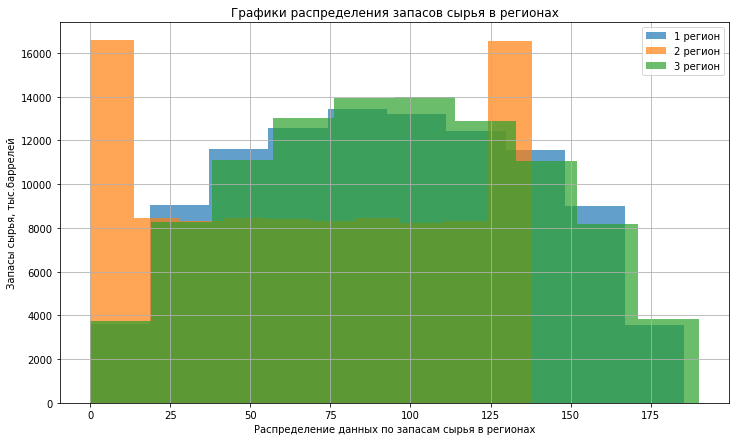

In [19]:
plt.title('Графики распределения запасов сырья в регионах')
ax=df_0['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, alpha=0.7, histtype='stepfilled', linewidth=3, label='1 регион')
ax1=df_1['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, alpha=0.7,histtype='stepfilled', linewidth=3, label='2 регион', ax=ax)
df_2['product'].plot(kind='hist',figsize=(12,7),grid=True, legend=True, alpha=0.7,histtype='stepfilled', linewidth=3, label='3 регион', ax=ax1)
plt.xlabel('Распределение данных по запасам сырья в регионах')
plt.ylabel('Запасы сырья, тыс.баррелей')
plt.show()

#### Вывод

Отлично! Мы успешно загрузили данные и не обнаружили необходимости проводить дополнительную предобработку. Теперь, после построения графиков, мы можем наглядно увидеть, как распределены запасы сырья в разных регионах. На графике четко видно, что распределение запасов сырья во втором регионе значительно отличается от других регионов. Это может иметь важное значение при анализе рентабельности разработки скважин в данном регионе. Кроме того, мы обратили внимание, что во втором регионе существует сильная зависимость между целевым показателем "profit" и признаком "f0". Такая зависимость может быть полезна для нашей модели, и предсказания, основанные на этой зависимости, могут быть высококачественными.

## Обучение и проверка модели

Удалим стоблцы id, так как они не нужны для обучения модели

In [20]:
df_0.drop('id', axis=1, inplace=True)
df_0

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


In [21]:
df_1.drop('id', axis=1, inplace=True)
df_1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [22]:
df_2.drop('id', axis=1, inplace=True)
df_2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


#### Разобьём данные на обучающую и валидационную выборки в соотношении 75:25

In [23]:
target_0=df_0['product']
features_0=df_0.drop(['product'], axis=1)

target_1=df_1['product']
features_1=df_1.drop(['product'], axis=1)

target_2=df_2['product']
features_2=df_2.drop(['product'], axis=1)

1 регион

In [24]:
#константа
RANDOM_STATE=12345

In [25]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=RANDOM_STATE)
target_val=target_valid_0.shape[0]/target_0.shape[0]
target_train=target_train_0.shape[0]/target_0.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(target_train))
print('Размер валидационной выборки - {:.0%}'.format(target_val))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


2 регион

In [26]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=RANDOM_STATE)
target_val=target_valid_1.shape[0]/target_1.shape[0]
target_train=target_train_1.shape[0]/target_1.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(target_train))
print('Размер валидационной выборки - {:.0%}'.format(target_val))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


3 регион

In [27]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=RANDOM_STATE)
target_val=target_valid_2.shape[0]/target_2.shape[0]
target_train=target_train_2.shape[0]/target_2.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(target_train))
print('Размер валидационной выборки - {:.0%}'.format(target_val))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


#### Обучим модель на обучающей выборке и выполним предсказания на валидационной выборке.

Далее оценим качество модели с использованием метрик RMSE (среднеквадратичная ошибка) и R2 (коэффициент детерминации).

1 регион

In [28]:
model_0=LinearRegression()
model_0.fit(features_train_0,target_train_0)
predict_0=model_0.predict(features_valid_0)
rmse_0 = mean_squared_error(target_valid_0, predict_0)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_0)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_0, predict_0))

Среднеквадратичная ошибка RMSE: 37.58
Коэффициент детерминации: 0.28


2 регион

In [29]:
model_1=LinearRegression()
model_1.fit(features_train_1,target_train_1)
predict_1=model_1.predict(features_valid_1)
rmse_1=mean_squared_error(target_valid_1, predict_1)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f' % rmse_1)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_1, predict_1))

Среднеквадратичная ошибка RMSE: 0.89
Коэффициент детерминации: 1.00


3 регион

In [30]:
model_2=LinearRegression()
model_2.fit(features_train_2,target_train_2)
predict_2=model_2.predict(features_valid_2)
rmse_2 = mean_squared_error(target_valid_2, predict_2)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_2)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_2, predict_2))

Среднеквадратичная ошибка RMSE: 40.03
Коэффициент детерминации: 0.21


Сохраняем предсказания и правильные ответы 

In [31]:
print('1 регион:\n- предсказания модели: "predict_0"\n- правильные ответы: "target_valid_0"')
print()
print('2 регион:\n- предсказания модели: "predict_1"\n- правильные ответы: "target_valid_1"')
print()
print('3 регион:\n- предсказания модели: "predict_2"\n- правильные ответы: "target_valid_2"')

1 регион:
- предсказания модели: "predict_0"
- правильные ответы: "target_valid_0"

2 регион:
- предсказания модели: "predict_1"
- правильные ответы: "target_valid_1"

3 регион:
- предсказания модели: "predict_2"
- правильные ответы: "target_valid_2"


Выведем на экран средний запас предсказанного сырья и значение метрики RMSE

In [32]:
data = {
    '1 регион': [predict_0.mean(), rmse_0],
    '2 регион': [predict_1.mean(), rmse_1],
    '3 регион': [predict_2.mean(), rmse_2]
}

comparison_tabl = pd.DataFrame(data, index=['средний запас предсказанного сырья', 'RMSE модели'])
comparison_tabl = comparison_tabl.transpose()
comparison_tabl

,средний запас предсказанного сырья,RMSE модели
1 регион,92.592568,37.579422
2 регион,68.728547,0.893099
3 регион,94.965046,40.029709


### Вывод

После обучения и проверки моделей на качество предсказания с использованием метрики RMSE, мы обратили внимание на значительное отличие значения RMSE во втором регионе от двух других. Это объясняется тем, что модель была обучена на данных с примерно одинаковыми значениями, что приводит к схожим величинам ошибки предсказания для этого региона.

## Подготовка к расчёту прибыли

Сохраним ключевые значения для расчётов в отдельных переменных

При разведке региона исследуюем 500 точек, из которых с помощью машинного обучения выберем 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс.
рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков оставим лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выберем регион с наибольшей средней прибылью.

In [33]:
BUDGET = 10000000 
INCOME_ONE_PROD = 450 
target_probability_losses = 2.5/100 
product_mean_0 = df_0['product'].mean()
product_mean_1 = df_1['product'].mean()
product_mean_2 = df_2['product'].mean()

In [34]:
print('Cредний запас в 1 регионе: %.2f млн.баррелей'%product_mean_0)
print('Cредний запас в 2 регионе: %.2f млн.баррелей'%product_mean_1)
print('Cредний запас в 3 регионе: %.2f млн.баррелей'%product_mean_2)

Cредний запас в 1 регионе: 92.50 млн.баррелей
Cредний запас в 2 регионе: 68.83 млн.баррелей
Cредний запас в 3 регионе: 95.00 млн.баррелей


In [35]:
budg_per_1_point=(BUDGET/200)
print('Бюджет на разработку одной скважины:', budg_per_1_point/1000,'млн.руб')

Бюджет на разработку одной скважины: 50.0 млн.руб


In [36]:
v_prod=budg_per_1_point/INCOME_ONE_PROD
print('Для безубыточной разработки каждой скважины необходимо, чтобы объем запасов сырья составлял не менее %.2f'%v_prod,'тыс.баррелей')

Для безубыточной разработки каждой скважины необходимо, чтобы объем запасов сырья составлял не менее 111.11 тыс.баррелей


#### Сравним полученный объём сырья со средним запасом в каждом регионе

1 регион

In [37]:
df_0['profit']=(df_0['product']*(INCOME_ONE_PROD)).round(2) # profit, тыс.руб
df_0.head()

,f0,f1,f2,product,profit
0,0.705745,-0.497823,1.221170,105.280062,47376.03
1,1.334711,-0.340164,4.365080,73.037750,32866.99
2,1.022732,0.151990,1.419926,85.265647,38369.54
3,-0.032172,0.139033,2.978566,168.620776,75879.35
4,1.988431,0.155413,4.751769,154.036647,69316.49


Для каждой скважины определим показатель ROI, который отражает отношение прибыли к затратам на разработку.

In [38]:
df_0['roi_%']=((df_0['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
df_0.head()

,f0,f1,f2,product,profit,roi_%
0,0.705745,-0.497823,1.221170,105.280062,47376.03,-5.25
1,1.334711,-0.340164,4.365080,73.037750,32866.99,-34.27
2,1.022732,0.151990,1.419926,85.265647,38369.54,-23.26
3,-0.032172,0.139033,2.978566,168.620776,75879.35,51.76
4,1.988431,0.155413,4.751769,154.036647,69316.49,38.63


In [39]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: {:.2%}'.format(product_mean_0/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_0))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 1 региону составляет: -16.75%
Или 18.61 тыс.баррелей


2 регион

In [40]:
df_1['profit']=(df_1['product']*INCOME_ONE_PROD).round(2) # profit, тыс.руб
df_1.head()

,f0,f1,f2,product,profit
0,-15.001348,-8.276000,-0.005876,3.179103,1430.60
1,14.272088,-3.475083,0.999183,26.953261,12128.97
2,6.263187,-5.948386,5.001160,134.766305,60644.84
3,-13.081196,-11.506057,4.999415,137.945408,62075.43
4,12.702195,-8.147433,5.004363,134.766305,60644.84


Для каждой скважины определим показатель ROI, который отражает отношение прибыли к затратам на разработку.

In [41]:
df_1['roi_%']=((df_1['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
df_1.head()

,f0,f1,f2,product,profit,roi_%
0,-15.001348,-8.276000,-0.005876,3.179103,1430.60,-97.14
1,14.272088,-3.475083,0.999183,26.953261,12128.97,-75.74
2,6.263187,-5.948386,5.001160,134.766305,60644.84,21.29
3,-13.081196,-11.506057,4.999415,137.945408,62075.43,24.15
4,12.702195,-8.147433,5.004363,134.766305,60644.84,21.29


In [42]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 2 региону составляет: {:.2%}'.format(product_mean_1/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_1))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 2 региону составляет: -38.06%
Или 42.29 тыс.баррелей


3 регион

In [43]:
df_2['profit']=(df_2['product']*INCOME_ONE_PROD).round(2) # profit, тыс.руб
df_2.head()

,f0,f1,f2,product,profit
0,-1.146987,0.963328,-0.828965,27.758673,12491.40
1,0.262778,0.269839,-2.530187,56.069697,25231.36
2,0.194587,0.289035,-5.586433,62.871910,28292.36
3,2.236060,-0.553760,0.930038,114.572842,51557.78
4,-0.515993,1.716266,5.899011,149.600746,67320.34


Для каждой скважины определим показатель ROI, который отражает отношение прибыли к затратам на разработку.

In [44]:
df_2['roi_%']=((df_2['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
df_2.head()

,f0,f1,f2,product,profit,roi_%
0,-1.146987,0.963328,-0.828965,27.758673,12491.40,-75.02
1,0.262778,0.269839,-2.530187,56.069697,25231.36,-49.54
2,0.194587,0.289035,-5.586433,62.871910,28292.36,-43.42
3,2.236060,-0.553760,0.930038,114.572842,51557.78,3.12
4,-0.515993,1.716266,5.899011,149.600746,67320.34,34.64


In [45]:
print('Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 3 региону составляет: {:.2%}'.format(product_mean_2/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_2))

Разница объёма сырья для безубыточной разработки скважины относительно среднего значения по 3 региону составляет: -14.50%
Или 16.11 тыс.баррелей


### Вывод

Как видим средние запасы сырья во всех регионах недостаточны для окупаемости разработки. Поэтому необходимо выбрать скважины с максимальными запасами для максимизации прибыли.

## Расчёт прибыли и рисков 

Выберем скважины с максимальными значениями предсказаний

In [46]:
predict_0

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

Выполним привязку индексов скважин к предсказаниям модели

In [47]:
#отсорируем список по убыванию
probs_sorted_0 = pd.Series(predict_0, index=target_valid_0.index).sort_values(ascending=False)
selected_max_0 = probs_sorted_0[:200]
selected_max_0

93073    180.180713
46784    176.252213
78948    175.850623
43388    175.658429
6496     173.299686
            ...    
30488    148.507064
98799    148.481767
53840    148.476498
4638     148.436761
75908    148.365941
Length: 200, dtype: float64

Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям

Учитывая ограничение на количество скважин, равное 200, мы можем выбрать скважины с максимальными предсказанными значениями объема сырья нашей модели. Затем мы суммируем значения запасов сырья этих скважин для достижения максимальной прибыли.

In [48]:
selected_max_0_sum = selected_max_0.sum()
print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max_0_sum)

Суммарный запас сырья в 200 лучших скважинах составит: 31102.33 тыс.баррелей


Рассчитаем прибыль для полученного объёма сырья

In [49]:
profit_prod=(selected_max_0_sum*INCOME_ONE_PROD)-BUDGET
print('Прибыль для полученного объёма сырья составит %.2f тыс.рублей'%profit_prod)

Прибыль для полученного объёма сырья составит 3996048.88 тыс.рублей


Занесём все вычисления в функцию

In [50]:
def profit_of_wells(predict,target,count):
    probs_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected_max = probs_sorted[:count].sum()
    profit_pred=(selected_max*INCOME_ONE_PROD)-BUDGET
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max)
    print('Прибыль для полученного объёма сырья составит %.2f млн.рублей'%(profit_pred/1000))

<div class="alert alert-block alert-success">
<b>Успех:</b> Ф-ция для подсчета прибыли определена верно
</div>

Прибыль в первом регионе:

In [51]:
profit_of_wells(predict_0,target_valid_0,200)

Суммарный запас сырья в 200 лучших скважинах составит: 31102.33 тыс.баррелей
Прибыль для полученного объёма сырья составит 3996.05 млн.рублей


Прибыль в втором регионе:

In [52]:
profit_of_wells(predict_1,target_valid_1,200)

Суммарный запас сырья в 200 лучших скважинах составит: 27746.03 тыс.баррелей
Прибыль для полученного объёма сырья составит 2485.71 млн.рублей


Прибыль в третьем регионе:

In [53]:
profit_of_wells(predict_2,target_valid_2,200)

Суммарный запас сырья в 200 лучших скважинах составит: 29603.90 тыс.баррелей
Прибыль для полученного объёма сырья составит 3321.75 млн.рублей


Вывод

Далее мы проведем расчет вероятности для каждого региона с целью определения наиболее выгодного региона с точки зрения окупаемости вложений и минимизации риска убытка.

## Расчёт прибыли и рисков 

#### Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

Найдём среднею прибыль, 95%-й доверительный интервал и риск убытков

In [54]:
def profit_of_wells_2(predict, target, count):
    probs_sorted = pd.Series(predict).sort_values(ascending=False)
    selected_points = target[probs_sorted.index][:count]
    product = selected_points.sum()
    revenue = product * INCOME_ONE_PROD
    profit = revenue - BUDGET
    return profit

In [55]:
def bootstrap_1000(target, predict):
    values = []
    count = 0
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict, index=target.index)
    
    for _ in tqdm(range(1000)):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample = predict_e[target_subsample.index]
        values.append(profit_of_wells_2(probs_subsample, target_subsample, 200))  
    
    count = sum(value < 0 for value in values)
    values = pd.Series(values)
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values) - 1, mean, values.sem())
    
    values.plot(kind="hist", grid=True, figsize=(8, 5))
    plt.title('Распределение прибыли')
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)
    
    print(f"Средняя прибыль: {mean / 1000:.2f} млн.руб")
    print(f"С вероятностью 95% прибыль в данном регионе будет составлять от: {low_95 / 1000:.2f} млн.руб до: {high_95 / 1000:.2f} млн.руб")
    print(f"95%-ый доверительный интервал: от {confidence_interval[0] / 1000:.2f} млн.руб до {confidence_interval[1] / 1000:.2f} млн.руб")
    print(f"Процент вероятности убытка в данном регионе составит {count / 1000:.1%}")

Распределение прибыли 1 регион

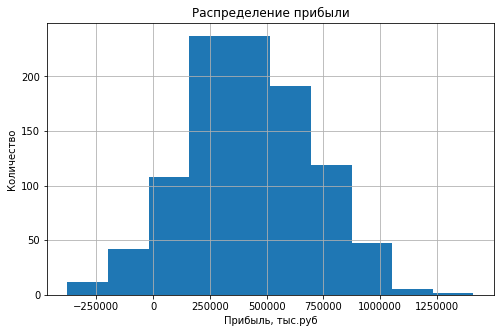

Средняя прибыль: 425.94 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -102.09 млн.руб до: 947.98 млн.руб
95%-ый доверительный интервал: от 408.73 млн.руб до 443.14 млн.руб
Процент вероятности убытка в данном регионе составит 6.0%


In [56]:
bootstrap_1000(target_valid_0,predict_0)

Распределение прибыли 2 регион

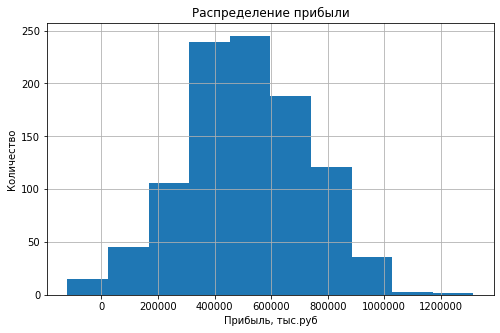

Средняя прибыль: 515.22 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 68.87 млн.руб до: 931.55 млн.руб
95%-ый доверительный интервал: от 501.62 млн.руб до 528.82 млн.руб
Процент вероятности убытка в данном регионе составит 1.0%


In [57]:
bootstrap_1000(target_valid_1,predict_1)

Распределение прибыли 3 регион

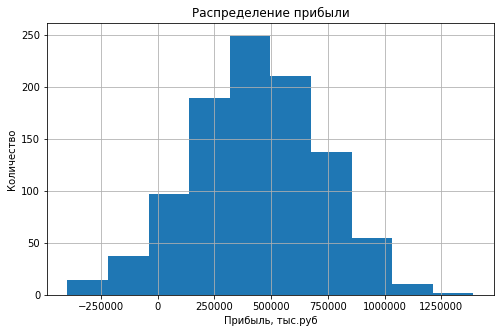

Средняя прибыль: 435.01 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -128.88 млн.руб до: 969.71 млн.руб
95%-ый доверительный интервал: от 417.45 млн.руб до 452.56 млн.руб
Процент вероятности убытка в данном регионе составит 6.4%


In [58]:
bootstrap_1000(target_valid_2,predict_2)

После проведения оценки рисков, мы оставим только те регионы, в которых вероятность убытков составляет менее 2.5%. Затем из этих регионов мы выберем тот, который имеет наибольшую среднюю прибыль.

Сравним среднюю прибыль, вероятность убытка и суммарный запас сырья трёх представленных регионов в таблице

In [59]:
comparison_tabl = pd.DataFrame(index=['Средняя прибыль в регионе, млн.руб','Суммарный запас сырья, тыс.баррелей','Вероятность убытка, %'], columns=['1 регион','2 регион','3 регион'])
comparison_tabl['1 регион'] = '435.84', '30881.96','6.0'
comparison_tabl['2 регион'] = '489.66', '27748.75','1.0'
comparison_tabl['3 регион'] = '403.95', '29730.68','6.4'
comparison_tabl

,1 регион,2 регион,3 регион
"Средняя прибыль в регионе, млн.руб",435.84,489.66,403.95
"Суммарный запас сырья, тыс.баррелей",30881.96,27748.75,29730.68
"Вероятность убытка, %",6.0,1.0,6.4


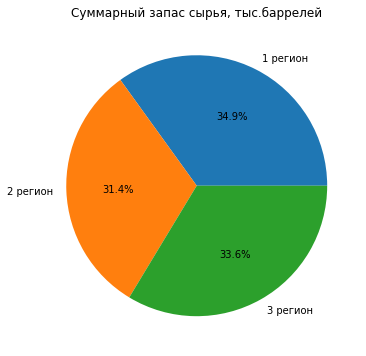

In [60]:
comparison_tabl.astype('float').iloc[1,:].plot(kind='pie', figsize=(6,6),autopct='%1.1f%%', subplots=True)
plt.title('Суммарный запас сырья, тыс.баррелей')
plt.ylabel('')
plt.show()

#### Вывод

Исходя из распределения средней прибыли по регионам, можно сделать вывод о том, что второй регион оказался самым прибыльным. В этом регионе средняя прибыль составляет 489.66 млн. рублей. Два других региона не соответствуют минимальному требованию по вероятности убытка в 2.5%. Несмотря на более низкие запасы сырья по сравнению с другими регионами, второй регион предсказывает более высокую доходность от скважин.

## Общий вывод

После изучения данных о запасах сырья в трех регионах, где были доступны информация о 10 000 скважинах, мы обнаружили, что средний запас ресурсов в каждом регионе недостаточен для окупаемости вложений в разработку. Для получения более надежных прогнозов по регионам мы обучили модель линейной регрессии и использовали технику бутстрэпа для создания 1000 подвыборок и предсказания прибыли.

На основе результатов и доверительного интервала прибыли в 95%, ограничивая вероятность убытка до 2.5%, мы выбрали наиболее перспективный регион для разработки 200 скважин. Несмотря на относительно низкие прогнозы запасов сырья в размере 27.75 млн. баррелей (по сравнению с другими регионами), второй регион демонстрирует низкую вероятность убытка (1%) и высокую среднюю прибыль в размере 489.66 млн. рублей. Именно поэтому мы советуем принять решение о разработке 200 скважин во втором регионе.